In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/Delphine-Jean/Delphine-Jean_portfolio/master/Portfolio%20Data%20Science/Projet%20K%20Mean/Mall_Customers.csv")

In [3]:
dataset.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X = dataset.iloc[:,1:]

In [5]:
X.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [6]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_cat = X.iloc[:,0]
x_num = X.iloc[:,1:]

In [7]:
sc = StandardScaler()
x_num = pd.DataFrame(sc.fit_transform(x_num), columns=x_num.columns)

X = pd.merge(x_num,x_cat, left_index=True, right_index=True)
X = pd.get_dummies(X, drop_first=True)

In [8]:
X.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0


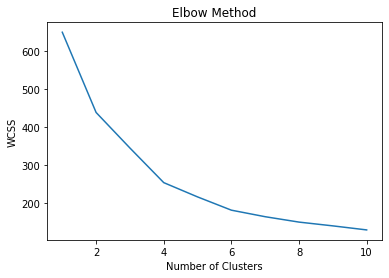

In [11]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i, init = "k-means++", max_iter=300, n_init=10,random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=4,init="k-means++",max_iter=300,n_init=10,random_state = 0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

For n_clusters = 2 The average silhouette_score is : 0.3031976564160757
For n_clusters = 3 The average silhouette_score is : 0.3142800845203407
For n_clusters = 4 The average silhouette_score is : 0.3502702043465398
For n_clusters = 5 The average silhouette_score is : 0.34977050035201074
For n_clusters = 6 The average silhouette_score is : 0.356485834425401
For n_clusters = 7 The average silhouette_score is : 0.3371493015510644


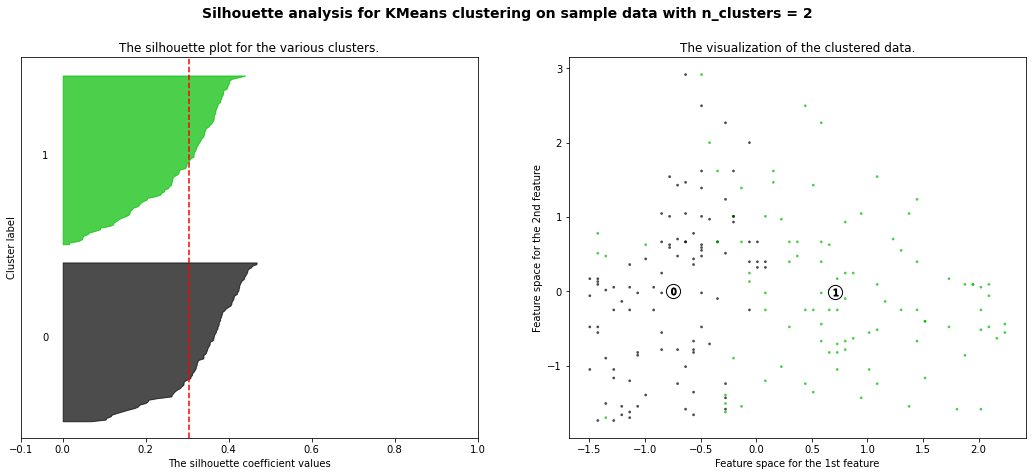

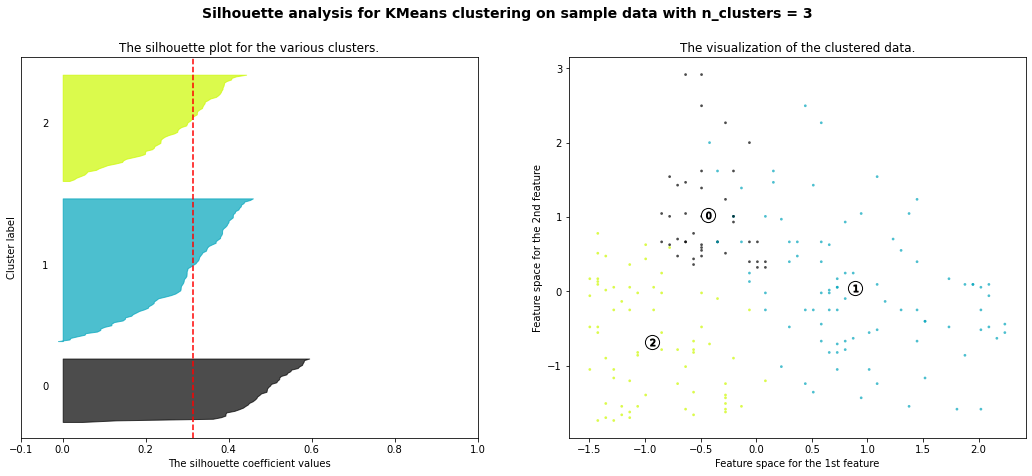

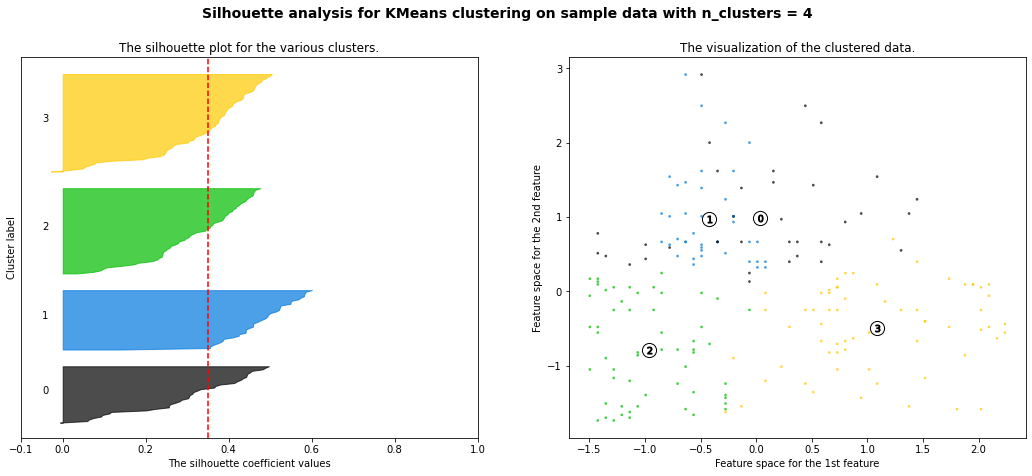

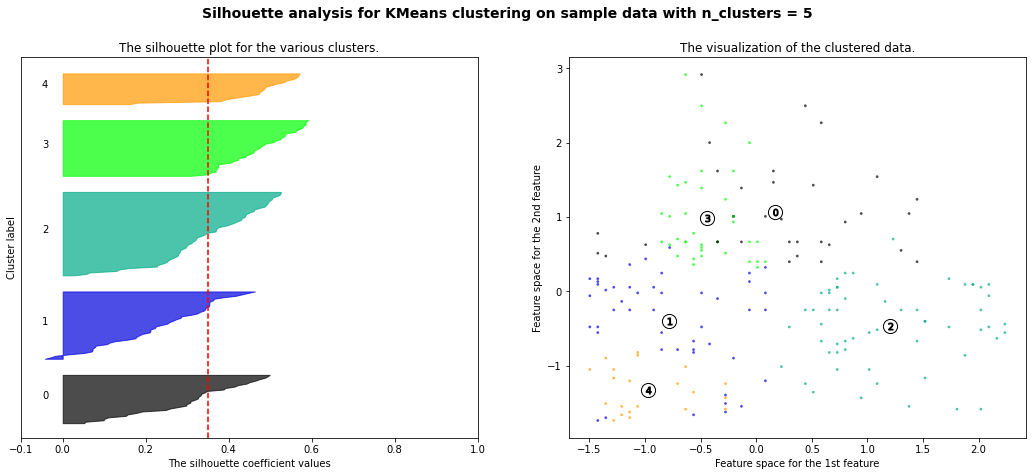

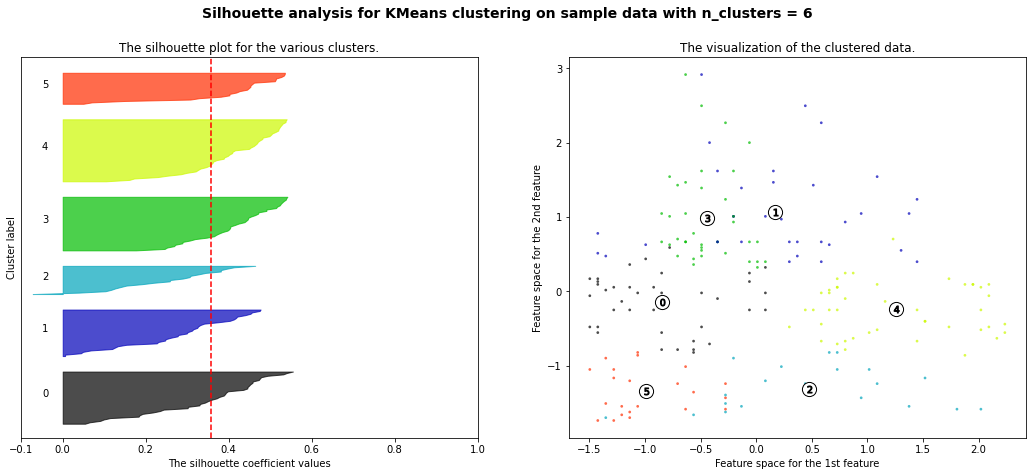

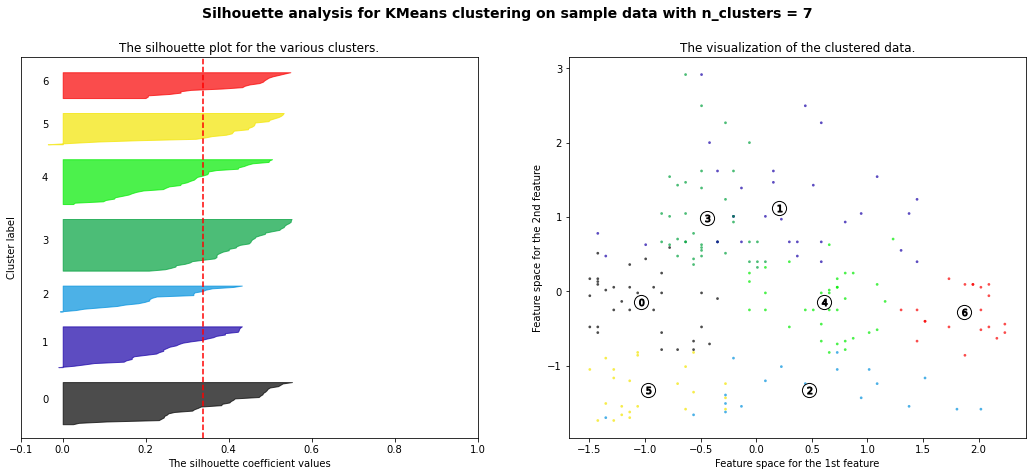

In [14]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

X_copy = X.copy()
X = X.values

range_n_clusters = [2, 3, 4, 5, 6,7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [18]:
# On applique KMeans à l'ensemble du dataset avec k = 5

X = pd.get_dummies(dataset.iloc[:,1:],drop_first=True)
kmeans = KMeans(n_clusters=5,init="k-means++",max_iter=300,n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(X)

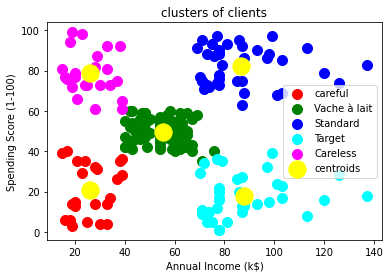

In [19]:
# Visualizing the clusters Sur Spending Score && Annual Income
plt.scatter(X.iloc[:, 1][y_kmeans == 0], X.iloc[:, 2][y_kmeans == 0], s = 100, c = 'red', label = 'careful')
plt.scatter(X.iloc[:, 1][y_kmeans == 1], X.iloc[:, 2][y_kmeans == 1], s = 100, c = 'green', label = 'Vache à lait')
plt.scatter(X.iloc[:, 1][y_kmeans == 2], X.iloc[:, 2][y_kmeans == 2], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X.iloc[:, 1][y_kmeans == 3], X.iloc[:, 2][y_kmeans == 3], s = 100, c = 'cyan', label = 'Target')
plt.scatter(X.iloc[:, 1][y_kmeans == 4], X.iloc[:, 2][y_kmeans == 4], s = 100, c = 'magenta', label = 'Careless')
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], s = 300, c = 'yellow', label = 'centroids')
plt.title('clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

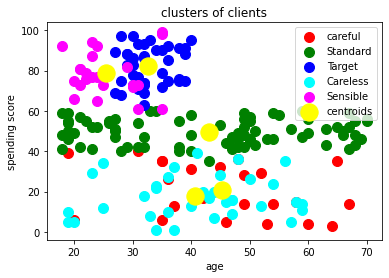

In [20]:
# Visualizing the clusters on Age + Spending Score
plt.scatter(X.iloc[:, 0][y_kmeans == 0], X.iloc[:, 2][y_kmeans == 0], s = 100, c = 'red', label = 'careful')
plt.scatter(X.iloc[:, 0][y_kmeans == 1], X.iloc[:, 2][y_kmeans == 1], s = 100, c = 'green', label = 'Standard')
plt.scatter(X.iloc[:, 0][y_kmeans == 2], X.iloc[:, 2][y_kmeans == 2], s = 100, c = 'blue', label = 'Target')
plt.scatter(X.iloc[:, 0][y_kmeans == 3], X.iloc[:, 2][y_kmeans == 3], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X.iloc[:, 0][y_kmeans == 4], X.iloc[:, 2][y_kmeans == 4], s = 100, c = 'magenta', label = 'Sensible')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,2], s = 300, c = 'yellow', label = 'centroids')
plt.title('clusters of clients')
plt.xlabel('age')
plt.ylabel('spending score')
plt.legend()
plt.show()

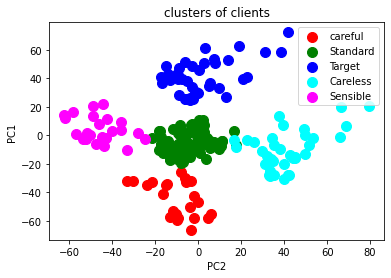

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_pca = pd.DataFrame(pca.fit_transform(X), columns = ["PC1", "PC2", "PC3"])

plt.scatter(X_pca.iloc[:, 1][y_kmeans == 0], X_pca.iloc[:, 0][y_kmeans == 0], s = 100, c = 'red', label = 'careful')
plt.scatter(X_pca.iloc[:, 1][y_kmeans == 1], X_pca.iloc[:, 0][y_kmeans == 1], s = 100, c = 'green', label = 'Standard')
plt.scatter(X_pca.iloc[:, 1][y_kmeans == 2], X_pca.iloc[:, 0][y_kmeans == 2], s = 100, c = 'blue', label = 'Target')
plt.scatter(X_pca.iloc[:, 1][y_kmeans == 3], X_pca.iloc[:, 0][y_kmeans == 3], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X_pca.iloc[:, 1][y_kmeans == 4], X_pca.iloc[:, 0][y_kmeans == 4], s = 100, c = 'magenta', label = 'Sensible')
#plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], s = 300, c = 'yellow', label = 'centroids')
plt.title('clusters of clients')
plt.xlabel('PC2')
plt.ylabel('PC1')
plt.legend()
plt.show()

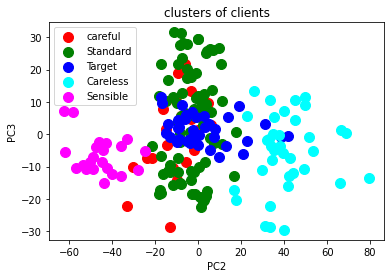

In [22]:
plt.scatter(X_pca.iloc[:, 1][y_kmeans == 0], X_pca.iloc[:, 2][y_kmeans == 0], s = 100, c = 'red', label = 'careful')
plt.scatter(X_pca.iloc[:, 1][y_kmeans == 1], X_pca.iloc[:, 2][y_kmeans == 1], s = 100, c = 'green', label = 'Standard')
plt.scatter(X_pca.iloc[:, 1][y_kmeans == 2], X_pca.iloc[:, 2][y_kmeans == 2], s = 100, c = 'blue', label = 'Target')
plt.scatter(X_pca.iloc[:, 1][y_kmeans == 3], X_pca.iloc[:, 2][y_kmeans == 3], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X_pca.iloc[:, 1][y_kmeans == 4], X_pca.iloc[:, 2][y_kmeans == 4], s = 100, c = 'magenta', label = 'Sensible')
#plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], s = 300, c = 'yellow', label = 'centroids')
plt.title('clusters of clients')
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.legend()
plt.show()

In [23]:
pd.DataFrame(pca.components_, columns = X.columns)

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,-0.188977,0.588623,0.786009,-0.000333
1,0.130961,0.808388,-0.573895,0.001579
2,0.973208,0.005515,0.229856,0.001462


In [24]:
pca.explained_variance_ratio_

array([0.45118077, 0.44091539, 0.10774566])

In [25]:
sc= StandardScaler()
X_scaled = pd.DataFrame(sc.fit_transform(X), columns=X.columns)

In [26]:
X_scaled.iloc[:, [1,2]].head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
